In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline

## Slide 2: fMRI Illustration

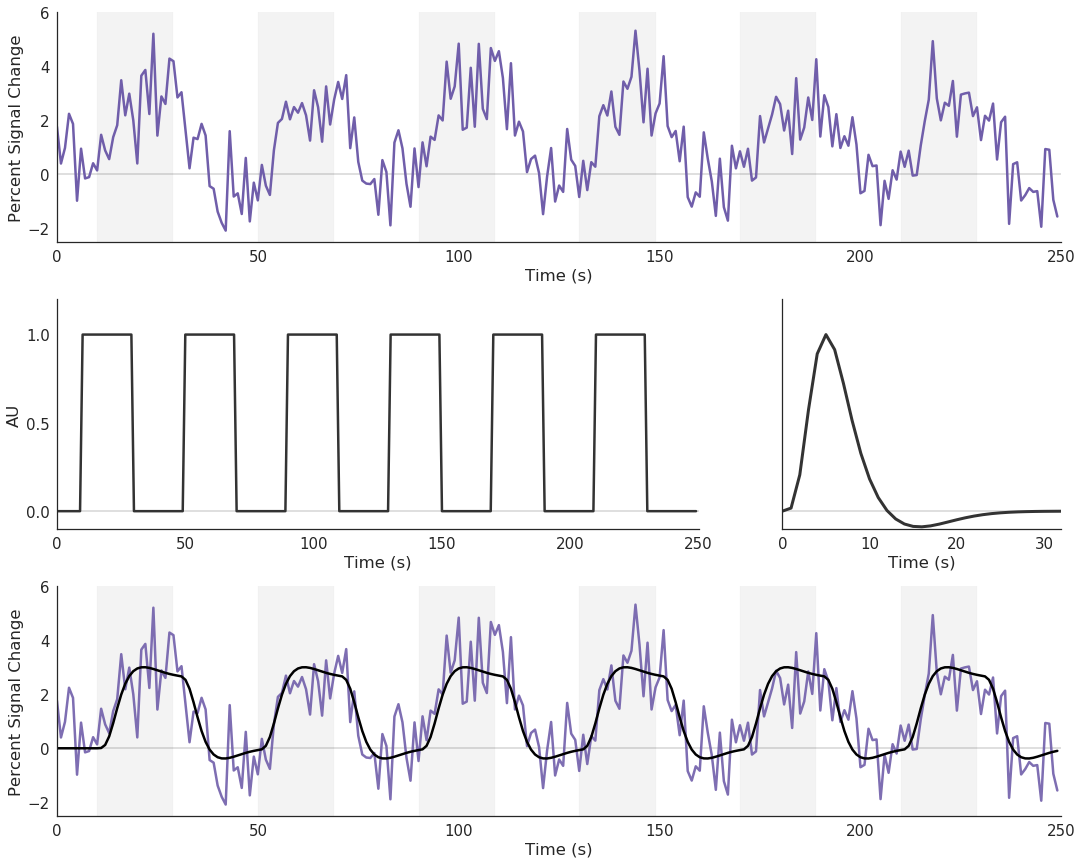

In [2]:
from scripts.spm_hrf import spm_hrf

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Generate data.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
np.random.seed(0)
    
## Generate HRF.
hrf = spm_hrf(1)
hrf /= hrf.max()

## Generate boxcars.
boxcars = np.zeros(250)
for onset in np.arange(10,250,40):
    boxcars[onset:onset+20] = 1
    
## Generate idealized regressor.
X = np.convolve(boxcars, hrf)[:boxcars.size]
X /= X.max()

## Generate data.
Y = 3 * X + np.random.normal(0,1,X.size)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot 1.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig = plt.figure(figsize=(15,12))

## Plot.
ax = plt.subplot2grid((3,3),(0,0),colspan=3)
ax.plot(Y, lw=2.5, color='#705eaa')

## Add checkerboard times. 
for onset in np.arange(10,250,40): 
    ax.fill_between(np.arange(onset,onset+20), -3.5, 7.5, color='0.1', alpha=0.05)
    
## Add info
ax.hlines(0, 0, 250, lw=0.25, zorder=0)
ax.set(xlim=(0,250), xlabel='Time (s)', ylim=(-2.5,6), yticks=np.arange(-2,10,2),
       ylabel=r'Percent Signal Change')

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot 2.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Plot boxcars.
ax = plt.subplot2grid((3,3),(1,0),colspan=2)
ax.plot(boxcars, lw=2.5, color='0.2')
ax.hlines(0, 0, 250, lw=0.25, zorder=0)
ax.set(xlim=(0,250), xlabel='Time (s)', ylim=(-0.1,1.2), yticks=[0,0.5,1], ylabel='AU')

## Plot HRF.
ax = plt.subplot2grid((3,3),(1,2))
ax.plot(hrf, lw=3, color='0.2')
ax.hlines(0, 0, 250, lw=0.25, zorder=0)
ax.set(xlim=(0,32), xlabel='Time (s)', ylim=(-0.1,1.2), yticks=[])

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plot 3.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Plot.
ax = plt.subplot2grid((3,3),(2,0),colspan=3)
ax.plot(Y, lw=2.5, color='#705eaa', alpha=0.9)
ax.plot(3*X, lw=2.5, color='k')

## Add checkerboard times. 
for onset in np.arange(10,250,40): 
    ax.fill_between(np.arange(onset,onset+20), -3.5, 7.5, color='0.1', alpha=0.05)
    
## Add info
ax.hlines(0, 0, 250, lw=0.25, zorder=0)
ax.set(xlim=(0,250), xlabel='Time (s)', ylim=(-2.5,6), yticks=np.arange(-2,10,2),
       ylabel=r'Percent Signal Change');

sns.despine()
plt.subplots_adjust(left=0.05, right=0.98, top=0.98, bottom=0.05, hspace=0.25, wspace=0.3)
plt.savefig('plots/slide_2.png', dpi=180)

## Slide 8: Hemisphere Comparison

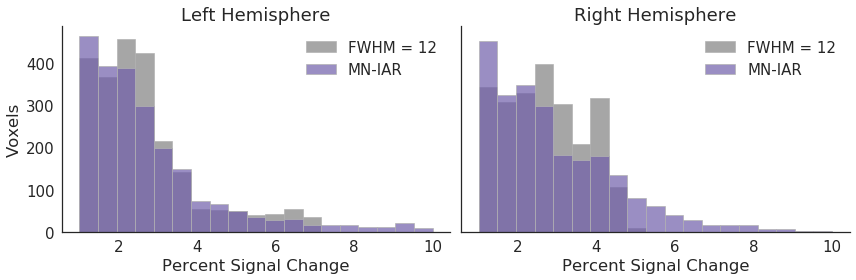

In [3]:
import nibabel as nib

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Main loop.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig, axes = plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True)

for ax, hemi in zip(axes, ['L','R']):
    
    ## Load data.
    iar = nib.load('data/data_iar-%s.nii.gz' %hemi).get_data().squeeze()
    iar = iar[iar > 1]
    
    sm12 = nib.load('data/data_ols_sm12-%s.nii.gz' %hemi).get_data().squeeze()
    sm12 = sm12[sm12 > 1]
    
    ## Plot.
    ax.hist(sm12, bins=np.linspace(1,10,20), color='0.5', label='FWHM = 12',
            linewidth=1, edgecolor='0.7', alpha=0.7)
    ax.hist(iar, bins=np.linspace(1,10,20), color='#705eaa', label='MN-IAR',
            linewidth=1, edgecolor='0.7', alpha=0.7)
    ax.set(xlabel='Percent Signal Change', title='%s Hemisphere' %('Left' if hemi=='L' else 'Right'))
    ax.legend(loc=1)
    
axes[0].set_ylabel('Voxels')
sns.despine()
plt.tight_layout()
plt.savefig('plots/slide_9.png', dpi=180)

## Pysurfer
NOTE: Requires Python 2.7

In [ ]:
import os, time
import numpy as np
import nibabel as nib
from surfer import Brain
%matplotlib qt5

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define overlay.
overlay = ['ols_sm03', 'ols_sm12', 'iar'][0]

## Define overlay parameters.
fmin = 1
fmax = 8

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define paths.
subjects_dir = '../../neu502b/fmri/preproc/freesurfer'

## Initialize brain.
brains = Brain('fsaverage6', 'split', 'pial', size=(1400,600), cortex='low_contrast',
               background='black', subjects_dir=subjects_dir)

## Change view.
brain1, brain2 = brains.brain_matrix.squeeze()
brain1.show_view(dict(azimuth=-40, elevation=105, focalpoint=[-25, -50, 100]))
brain2.show_view(dict(azimuth=-140, elevation=105, focalpoint=[100, -50, 100]))
brains.set_distance(280)

## Load overlays.
for hemi in ['L','R']:

    f = os.path.join('data/data_%s-%s.nii.gz' %(overlay, hemi))
    brains.add_overlay(f, min=fmin, max=fmax, sign='pos', hemi='lh' if hemi=='L' else 'rh')
    
## Remove colorbars. 
brains.hide_colorbar()

In [ ]:
brains.save_image('plots/%s.png' %overlay)
brains.close()